In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as am
import vartests

0.1.9


In [2]:
columns = ['SPX', 'DAX', 'WIG20', 'EURUSD']
data = pd.read_csv('study_data.csv', header=0, names=['Date', 'SPX', 'DAX', 'WIG20', 'EURUSD'], index_col='Date', parse_dates=['Date'])

In [3]:
#predict implied volatility and VaR based on multivariate GARCH(1,1) model
b_var_forecast = pd.read_csv('varf_h_forecast_bayesian.csv', parse_dates=['Date'], index_col='Date')
b_var_forecast

SPX       DAX     WIG20    EURUSD
Date                                              
2013-02-11  0.411755  1.275139  1.171095  0.163066
2013-02-12  0.480419  0.564075 -0.315363  0.130588
2013-02-13 -2.197032 -3.328634 -2.204327 -1.189345
2013-02-14 -0.098943 -0.322014 -1.134790 -0.265777
2013-02-15 -1.042522 -1.553301 -0.570440 -0.511490
...              ...       ...       ...       ...
2022-03-14 -2.514751 -2.662885 -3.138229 -0.137563
2022-03-15 -1.608996 -0.768789 -0.709772 -0.117092
2022-03-16 -0.580955  0.042155 -1.432334  0.023891
2022-03-17  1.029394 -0.478891 -1.923620  0.020318
2022-03-18  0.285907  0.667759  0.305632 -0.033961

[2060 rows x 4 columns]

In [4]:
#plot forecast rates of return
fig, ax = plt.subplots(4, 1, dpi=100, figsize=(10,10))
plt.suptitle('Forecast Rates of Return from VAR(1) Model')

a=0
for i in columns:
    ax[a].plot(b_var_forecast[i], c='#203271')
    ax[a].set_title('%s' %i)
    a += 1
    
plt.tight_layout()
plt.show()
fig.savefig('returns forecast bayesian.png', bbox_inches='tight')

In [5]:
#porfolio weights vector omega_t (time-constant)
omega = np.array([.625, .235, .11, .03])

In [6]:
#H-matrices forecast
H_b_forecast = pd.read_csv('dccf_H_forecast_bayesian.csv')
H_b_forecast

H11       H12       H13       H14       H21       H22       H23  \
0    0.610120  0.688360  0.452032  0.227313  0.688360  1.459459  0.939307   
1    0.664117  0.683270  0.473868  0.249968  0.683270  1.394008  0.908004   
2    1.007064  0.752703  0.665991  0.281925  0.752703  1.326328  0.845417   
3    0.749560  0.603049  0.498753  0.242718  0.603049  1.184219  0.761466   
4    1.079430  0.903475  0.553659  0.247488  0.903475  1.598430  0.796724   
..        ...       ...       ...       ...       ...       ...       ...   
98   0.727402  0.430931  0.420326  0.112934  0.430931  0.979680  0.863133   
99   0.755806  0.342553  0.531963  0.169436  0.342553  0.705663  0.627687   
100  0.929990  0.440993  0.349625  0.110404  0.440993  0.894748  0.552033   
101  2.488260  0.845702  0.636420  0.072860  0.845702  1.167391  0.678141   
102  1.693868  0.622066  0.618007  0.127175  0.622066  1.063135  0.748731   

          H24       H31       H32       H33       H34       H41       H42  \
0    0.331352  0.452032  0.939307  1.387960  0.244768  0.227313  0.331352   
1    0.323494  0.473868  0.908004  1.276445  0.253931  0.249968  0.323494   
2    0.275688  0.665991  0.845417  1.377176  0.258116  0.281925  0.275688   
3    0.245529  0.498753  0.761466  1.288123  0.238225  0.242718  0.245529   
4    0.213590  0.553659  0.796724  1.182114  0.219017  0.247488  0.213590   
..        ...       ...       ...       ...       ...       ...       ...   
98   0.072835  0.420326  0.863133  2.499666  0.106235  0.112934  0.072835   
99   0.030640  0.531963  0.627687  1.942645  0.148965  0.169436  0.030640   
100  0.021502  0.349625  0.552033  1.325877  0.043366  0.110404  0.021502   
101 -0.022028  0.636420  0.678141  1.402686  0.023463  0.072860 -0.022028   
102  0.012548  0.618007  0.748731  1.644221  0.067544  0.127175  0.012548   

          H43       H44  
0    0.244768  0.349152  
1    0.253931  0.364554  
2    0.258116  0.325468  
3    0.238225  0.335034  
4    0.219017  0.346685  
..        ...       ...  
98   0.106235  0.155034  
99   0.148965  0.220557  
100  0.043366  0.148962  
101  0.023463  0.161212  
102  0.067544  0.151798  

[103 rows x 16 columns]

In [7]:
#VaR forecast
from scipy.stats import norm

z_alpha = norm().ppf(.95)
VaR = []
j = 0

for i in range(len(b_var_forecast)):
    if (((i%20)==0) & (i!=20)):
        j+=1
    H_b_t = np.array(H_b_forecast.iloc[j]).reshape((4,4)).T
    VaR_b = (1-np.exp(omega@b_var_forecast.iloc[i]+z_alpha*np.sqrt(omega.T@H_b_t@omega)))
    VaR.append(VaR_b)

VaR = pd.DataFrame(VaR, columns=['VaR forecast'], index=b_var_forecast.index)
VaR

VaR forecast
Date                    
2013-02-11     -6.750030
2013-02-12     -4.806783
2013-02-13      0.659231
2013-02-14     -1.964376
2013-02-15     -0.299896
...                  ...
2022-03-14      0.576658
2022-03-15     -0.521016
2022-03-16     -2.245350
2022-03-17     -6.441683
2022-03-18     -6.810508

[2060 rows x 1 columns]

In [8]:
#VaR assessment
#calculate portfolio returns
data_short = data.iloc[-len(b_var_forecast):]
daily_return = []

for i in range(len(b_var_forecast)):
    portfolio_daily_return = data_short[columns].iloc[i]@omega.T
    daily_return.append(portfolio_daily_return)

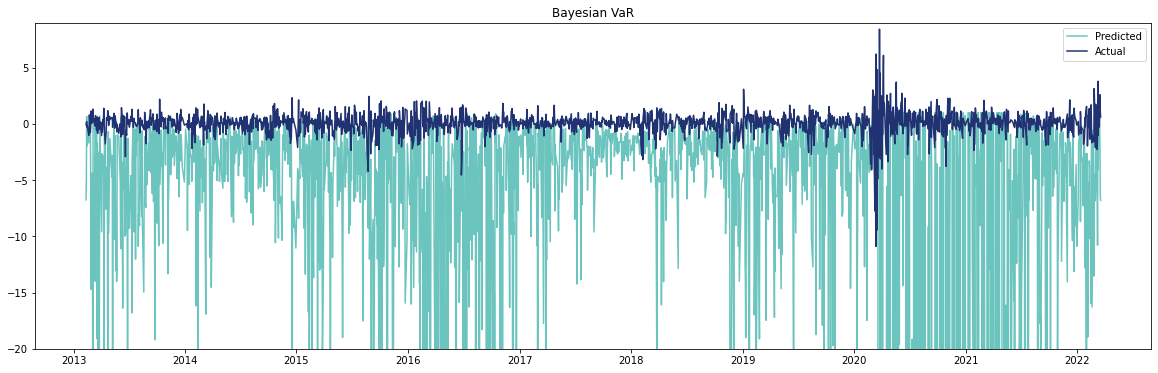

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(20,6))
plt.plot(VaR, color='#6bc5be')
plt.plot(data_short.index, daily_return, c='#203271')
plt.ylim((-20, 9))
plt.title('Bayesian VaR')
plt.legend(['Predicted','Actual'])
plt.show()
plt.savefig('bayesian VaR.png', bbox_inches='tight')

In [10]:
VaR['Actual'] = daily_return
VaR['Exceeded'] = np.where(VaR['VaR forecast']>VaR['Actual'], True, False)
VaR

VaR forecast    Actual  Exceeded
Date                                        
2013-02-11     -6.750030 -0.075559     False
2013-02-12     -4.806783  0.070751     False
2013-02-13      0.659231  0.197663      True
2013-02-14     -1.964376 -0.290953     False
2013-02-15     -0.299896 -0.131097     False
...                  ...       ...       ...
2022-03-14      0.576658 -0.282426      True
2022-03-15     -0.521016  1.466094     False
2022-03-16     -2.245350  2.591730     False
2022-03-17     -6.441683  1.044465     False
2022-03-18     -6.810508  0.618040     False

[2060 rows x 3 columns]

In [11]:
print('VaR exceeded %10.4f' % float(sum(VaR['Exceeded'])*100/len(VaR)), '% of the time')

VaR exceeded    12.5243 % of the time


In [12]:
vartests.kupiec_test(VaR['Exceeded'], var_conf_level=0.95, conf_level=0.95)

OverflowError: integer division result too large for a float